In [2]:
import codecs
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random, sys
import pandas as pd
from urllib.parse import quote_plus

#텍스트를 읽어온다. 
fp = pd.read_csv('all_event.csv')
#fp.close() 

import csv
with open('all_event.csv' , 'rt') as fin:
    cin = csv.reader(fin) 
    all_event = [row for row in cin]
    
fin.close()

In [3]:
results = []
for i , event in enumerate(all_event):
    print(i , event)
    event = event[1:] #''제거
    
    if '' in event:
        event = event[:event.index('')]
        
    evt_txt = ' '.join(event) 
    results.append(evt_txt)
    
results = results[1:]

0 ['', 'time-1', 'time-2', 'time-3', 'time-4', 'time-5', 'time-6', 'time-7', 'time-8', 'time-9', 'time-10', 'time-11', 'time-12', 'time-13', 'time-14', 'time-15', 'time-16', 'time-17', 'time-18', 'time-19', 'time-20', 'time-21', 'time-22', 'time-23']
1 ['event-1', 'No3368', 'En1339', 'Po1313', 'Te1354', 'En2411', 'No2563', 'Po3339', 'Bu2471', 'Ec3212', 'Se2421', '', '', '', '', '', '', '', '', '', '', '', '', '']
2 ['event-2', 'En1314', 'En1442', 'Se3242', 'Tr3139', 'Tr2346', 'Se3233', 'En1434', 'No1366', 'No2127', 'No1433', 'Tr1241', 'Se3252', 'Se3514', '', '', '', '', '', '', '', '', '', '']
3 ['event-3', 'No2112', 'Tr3443', 'Se1248', 'No2271', 'Se3329', 'Tr3257', 'Te2114', 'Ec3234', 'Tr1476', 'Te3367', 'Po2178', 'Se1335', 'Se3141', 'Tr1321', 'Po2559', 'Po2533', 'Te1441', '', '', '', '', '', '']
4 ['event-4', 'Bu1271', 'En3567', 'Te3328', 'Bu2155', 'Po2468', 'Se1428', 'Bu3143', 'Ec1262', 'Bu1435', 'Bu3511', 'No3478', '', '', '', '', '', '', '', '', '', '', '', '']
5 ['event-5', 'Se11

1735 ['event-1735', 'Se2372', 'Se2518', 'No3418', 'Te2453', 'Te2316', 'Te1166', 'Ec3261', 'Ec1553', 'Ec3261', 'Ec3412', 'Se2157', 'Tr3536', 'No2371', 'No1323', '', '', '', '', '', '', '', '', '']
1736 ['event-1736', 'En3538', 'Tr2236', 'Bu2322', 'Po2224', 'Se3232', 'Ec3462', 'Ec3213', 'Bu2457', 'Tr1428', 'Bu2269', 'Se3179', 'Te2428', 'En1423', 'En3168', 'Te2375', '', '', '', '', '', '', '', '']
1737 ['event-1737', 'No3341', 'Bu3468', 'Bu3234', 'Se1238', 'Bu2245', 'No3376', 'Po2147', 'Bu3524', 'Bu2568', 'Te3248', 'Te2154', 'Bu2552', 'Tr1568', 'Te2111', 'Ec1476', 'Tr2233', 'No3417', 'No2275', 'Te3147', 'Po1172', 'Bu3274', 'Tr2341', '']
1738 ['event-1738', 'Bu2471', 'No1526', 'Tr1115', 'Po3254', 'Bu3138', 'Ec2461', 'No3319', 'Te2471', 'En2342', 'No3522', 'Se2213', '', '', '', '', '', '', '', '', '', '', '', '']
1739 ['event-1739', 'Se1351', 'Bu3473', 'Ec1514', 'Po2116', 'Ec2137', 'Te1145', 'En2131', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
1740 ['event-1740', 'Se211

3344 ['event-3344', 'Se3372', 'No1524', 'Ec2271', 'No2134', 'Se2461', 'No2473', 'En1526', 'Bu3217', 'No2577', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
3345 ['event-3345', 'Ec3573', 'Se3254', 'Tr2275', 'Se3128', 'No2254', 'Te1273', 'Bu2243', 'Po1432', 'Se2457', 'Te2274', 'No3136', '', '', '', '', '', '', '', '', '', '', '', '']
3346 ['event-3346', 'Te1576', 'Te2238', 'Po2151', 'No2321', 'Bu3258', 'Bu1116', 'Bu2445', 'Se3512', 'Tr1259', 'No1466', 'Se3277', 'Se1442', 'No3113', 'Tr3277', 'Te1247', 'Bu3448', 'Te2169', 'Ec1229', 'Se3351', 'Tr2422', 'Ec1332', '', '']
3347 ['event-3347', 'Bu3337', 'Po2354', 'Te2426', 'Ec1129', 'No3454', 'Ec3131', 'Tr1431', 'Te3143', 'No2179', 'Bu2419', 'Ec2278', '', '', '', '', '', '', '', '', '', '', '', '']
3348 ['event-3348', 'Tr1541', 'Te2335', 'Se2116', 'Po2547', 'Tr3345', 'Te1277', 'Se1477', 'Bu2535', 'Ec1238', 'No3148', 'Po2449', 'Ec2379', 'Te3576', 'Tr3173', 'No1253', 'Ec3158', 'Bu2113', 'Te2318', 'Tr2516', 'No2329', '', '', '']
3349 ['e

4985 ['event-4985', 'Bu2577', 'Te3355', 'Ec3378', 'Te2168', 'Bu3476', 'Ec1273', 'En1169', 'Ec1438', 'Bu2217', 'Tr3422', 'En3147', 'Te3538', 'Te3215', '', '', '', '', '', '', '', '', '', '']
4986 ['event-4986', 'En3516', 'Te2215', 'Tr1226', 'En1566', 'No2319', 'Tr2266', 'No2429', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
4987 ['event-4987', 'Ec1147', 'Tr2242', 'Po3517', 'En1235', 'Te1534', 'Ec2419', 'Te2279', 'Tr2122', 'Bu1478', 'Ec1419', '', '', '', '', '', '', '', '', '', '', '', '', '']
4988 ['event-4988', 'No1274', 'Tr2129', 'Se2452', 'Bu3553', 'Po1546', 'Bu3236', 'En3469', 'No1549', 'Tr1461', 'Po1362', 'No1252', 'No1343', 'En3339', 'Bu2113', 'Bu1179', 'No1224', '', '', '', '', '', '', '']
4989 ['event-4989', 'Te3167', 'No2314', 'Te2177', 'Ec1555', 'Tr1433', 'No3463', 'Bu3533', 'Se1272', 'Se1412', 'Te1255', 'Ec3323', 'En2117', 'Po1137', 'No3351', 'Se1271', 'Tr3348', '', '', '', '', '', '', '']
4990 ['event-4990', 'Bu3473', 'Po3411', 'Ec3239', 'En2572', 'Po2271'

6734 ['event-6734', 'Tr3262', 'Po2371', 'En2376', 'Se2511', 'Po3341', 'Ec3135', 'Bu2345', 'Tr1423', 'Bu2552', 'Bu3249', 'Po1372', 'En1136', 'Se2268', '', '', '', '', '', '', '', '', '', '']
6735 ['event-6735', 'Tr3158', 'Se3262', 'Se1451', 'Tr3243', 'En2143', 'Se1546', 'Po2264', 'Po3224', 'Bu3428', 'Bu1243', 'Tr3244', 'Se1351', '', '', '', '', '', '', '', '', '', '', '']
6736 ['event-6736', 'Tr3249', 'Tr3251', 'Bu2475', 'Te1254', 'Bu1526', 'Po2213', 'Te3135', 'Po2415', 'Ec1269', 'Te1272', 'Bu1314', 'Se2522', 'Tr3225', '', '', '', '', '', '', '', '', '', '']
6737 ['event-6737', 'Te2327', 'Bu2113', 'En2276', 'Po3533', 'Te3368', 'No3121', 'Ec1253', 'Ec1426', 'En1424', 'No2579', 'No2277', 'Se1137', 'No3545', 'No1547', '', '', '', '', '', '', '', '', '']
6738 ['event-6738', 'Te3113', 'En2176', 'Ec1175', 'En3526', 'Te1448', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
6739 ['event-6739', 'Te2512', 'Se1248', 'Bu1313', 'Bu1166', 'En3439', 'Ec1233', 'En1163', '', '', 

8484 ['event-8484', 'En1334', 'Ec1154', 'Bu2554', 'Po2345', 'Te3376', 'Ec1144', 'En2445', 'Se3134', 'Tr1377', 'Po1462', 'En2354', 'Bu2556', 'Ec3428', 'Po1566', '', '', '', '', '', '', '', '', '']
8485 ['event-8485', 'No1269', 'Tr3348', 'Se3426', 'Se1568', 'Te2459', 'Po2243', 'Tr2569', 'Se3137', 'Po3128', 'En2136', 'Se1549', 'En3471', 'En3252', 'En3332', 'Te3158', 'Bu1465', 'Bu1162', 'En1568', 'Po1359', '', '', '', '']
8486 ['event-8486', 'Ec1443', 'Bu2421', 'Po3222', 'En3345', 'En1151', 'Se3251', 'Tr1178', 'Ec1363', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
8487 ['event-8487', 'Te2368', 'En2432', 'Ec2318', 'En1153', 'Se1139', 'Ec3415', 'Bu3268', 'Tr2269', 'En2456', 'Tr3372', 'Te3323', 'Ec1336', 'Te1575', 'No3538', 'Tr3428', 'Se2451', 'No1465', 'No3112', '', '', '', '', '']
8488 ['event-8488', 'Se3178', 'Se2533', 'No3338', 'Se1354', 'Se2218', 'Ec3576', 'No1345', 'En1436', 'En1141', 'Se3359', 'Tr1278', '', '', '', '', '', '', '', '', '', '', '', '']
8489 ['event-8489', 

10234 ['event-10234', 'Po3576', 'En3567', 'Te2157', 'En3419', 'En2455', 'En3544', 'En3173', 'Se3376', 'Ec1412', 'Ec2526', 'Se1378', 'Ec1528', 'Po3512', 'Po1536', 'No2379', 'Ec2274', 'Bu3374', 'En2453', 'Te3172', 'Se3526', '', '', '']
10235 ['event-10235', 'Tr3122', 'No3132', 'Ec1239', 'Se3549', 'Se2512', 'Te2317', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
10236 ['event-10236', 'Po3257', 'No2471', 'Po3243', 'Tr2521', 'Bu1129', 'Tr2176', 'Tr2272', 'Tr3328', 'Se2531', 'Bu2521', 'En1444', '', '', '', '', '', '', '', '', '', '', '', '']
10237 ['event-10237', 'Bu2347', 'Ec2328', 'En1537', 'Se1358', 'Tr1261', 'Tr1156', 'No3356', 'Tr3361', 'En1564', 'Bu2543', 'No1341', 'Se2528', 'Bu2126', 'Se3176', 'Po3477', 'No3333', 'Se1372', 'Te3471', 'Te2165', 'No3369', 'No3513', 'No1332', '']
10238 ['event-10238', 'Ec2317', 'En2368', 'En1525', 'Ec2449', 'Po1169', 'Po3249', 'No3341', 'En2239', 'Po1149', 'No3258', 'En2562', 'Po1245', 'Po1553', 'En1539', 'Po1467', 'Bu2178', 'En2524'

12015 ['event-12015', 'En1436', 'Te2232', 'Ec2442', 'En1355', 'Se2361', 'En2458', 'Bu1432', 'Te1455', 'Po2112', 'Bu3372', '', '', '', '', '', '', '', '', '', '', '', '', '']
12016 ['event-12016', 'Bu3431', 'Se3513', 'Bu1153', 'No2358', 'Tr1337', 'Te1513', 'Se3253', 'Te3273', 'En1566', 'Bu2125', 'No3231', 'No3536', 'Ec1445', 'Te2362', 'No1569', 'Te2457', 'Bu1534', 'Tr2249', 'En1466', '', '', '', '']
12017 ['event-12017', 'Tr2315', 'Te3133', 'Se3148', 'Tr2562', 'Bu2479', 'Tr3177', 'Bu2376', 'Tr2551', 'Tr1218', 'En2311', 'En1437', 'En3415', 'En2459', 'En1246', 'Ec3333', 'Bu3139', 'Te3116', '', '', '', '', '', '']
12018 ['event-12018', 'No2537', 'No3274', 'Bu3278', 'Tr2411', 'Ec2546', 'Tr2164', 'En1515', 'Te3544', 'Se3346', 'Tr3342', '', '', '', '', '', '', '', '', '', '', '', '', '']
12019 ['event-12019', 'Bu1465', 'Bu2565', 'Bu2153', 'Bu3127', 'Te1219', 'En1329', 'Bu2352', 'Se3368', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
12020 ['event-12020', 'En1129', 'Bu3365', 'Po1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




33502 ['event-33502', 'Bu2116', 'Po1444', 'Bu1367', 'Tr2266', 'En1568', 'Te2368', 'Ec3321', 'En2479', 'Te2354', 'No2352', 'Tr1147', 'No3447', 'Bu1337', 'Ec3466', 'Bu3448', 'En2411', 'En2228', '', '', '', '', '', '']
33503 ['event-33503', 'Te2464', 'Se1252', 'En2236', 'Se2556', 'No3141', 'Te3432', 'En3475', 'Bu2547', 'Bu3515', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
33504 ['event-33504', 'Bu3143', 'Se1438', 'En1123', 'Se1238', 'No2558', 'No2229', 'Tr1511', 'Ec3213', 'En3547', 'No2164', 'Tr2561', '', '', '', '', '', '', '', '', '', '', '', '']
33505 ['event-33505', 'Bu3229', 'Te3124', 'Po1574', 'Bu3324', 'Se3455', 'En2211', 'Tr1361', 'No1349', 'Se2528', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
33506 ['event-33506', 'Tr3562', 'Ec3518', 'En2416', 'En2112', 'Te2346', 'No2319', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
33507 ['event-33507', 'Se1253', 'Ec1517', 'Tr1251', 'Te3318', 'Te3178', 'Te2521', 'Se2442', 'Se3247', 'No2214', 'No35

35481 ['event-35481', 'No3167', 'Bu3579', 'Tr2425', 'Po3327', 'Tr1521', 'Po1126', 'Ec1214', 'Bu3554', 'Se3541', 'Bu1332', 'Tr2229', 'Se3469', '', '', '', '', '', '', '', '', '', '', '']
35482 ['event-35482', 'Bu1439', 'Bu2224', 'Bu3526', 'Ec1312', 'Se3449', 'Ec1545', 'Tr3267', 'Po1468', 'Ec3466', 'En1122', 'Ec3464', 'Te2258', '', '', '', '', '', '', '', '', '', '', '']
35483 ['event-35483', 'Tr1161', 'No2352', 'Tr1416', 'En1434', 'Tr3161', 'Tr2475', 'Te1472', 'Tr1334', 'Te1475', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
35484 ['event-35484', 'Tr2138', 'Ec2562', 'Se1334', 'No3345', 'Bu2515', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
35485 ['event-35485', 'Po3543', 'En2535', 'En3222', 'No1354', 'Po3175', 'Tr3538', 'Po2146', 'Se3365', 'No1435', 'Po2379', 'Bu3141', 'No3229', 'Se3522', 'En1359', 'Ec1316', 'Ec1566', 'Se1361', 'Te3245', 'En3267', 'Tr3364', 'Ec1553', '', '']
35486 ['event-35486', 'Ec3472', 'En2538', 'Se3476', 'Bu2431', 'Po2542', 'Te3

37480 ['event-37480', 'Se1173', 'Te2138', 'No3343', 'Tr2276', 'Bu2178', 'Bu3266', 'No1564', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
37481 ['event-37481', 'En1571', 'En2364', 'Te3415', 'Se1114', 'Ec1277', 'Bu3371', 'Bu1278', 'En2558', 'En1122', 'En2331', 'Se1563', 'Ec3252', 'Po3342', '', '', '', '', '', '', '', '', '', '']
37482 ['event-37482', 'En2162', 'Bu3271', 'Tr3566', 'No3234', 'Tr3224', 'Bu3436', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
37483 ['event-37483', 'Bu2143', 'En1265', 'Ec1141', 'Se1474', 'Bu2178', 'No1431', 'Tr1269', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
37484 ['event-37484', 'Bu1262', 'Te2365', 'Bu2219', 'En3217', 'Ec1311', 'Tr3149', 'Ec2577', 'Se2151', 'En1347', 'Se3348', 'Tr1267', 'No1241', 'Se3261', 'Tr3475', '', '', '', '', '', '', '', '', '']
37485 ['event-37485', 'En2113', 'Se1374', 'Se2235', 'Tr2119', 'Se2412', 'Se1551', 'No2137', 'Po1372', 'Tr1114', 'No1467', 'Se3148', 'Ec2125', 'No256

39254 ['event-39254', 'Se3139', 'Se3176', 'No1321', 'Po1246', 'No3167', 'Tr1163', 'Po3278', 'Te3376', 'Bu3468', 'Tr2555', '', '', '', '', '', '', '', '', '', '', '', '', '']
39255 ['event-39255', 'Te2429', 'Tr2136', 'Bu3251', 'Ec2472', 'No1157', 'Ec2157', 'Tr2135', 'No1165', 'Se2139', 'No2317', 'Ec3354', 'No2123', 'En1449', 'Se1318', '', '', '', '', '', '', '', '', '']
39256 ['event-39256', 'Po1446', 'No2424', 'Po1338', 'Te2249', 'Bu2427', 'Bu3255', 'Tr2355', 'Te1571', 'En3216', 'Se1247', 'Po2537', 'Po1154', '', '', '', '', '', '', '', '', '', '', '']
39257 ['event-39257', 'Te2573', 'Se3574', 'Se1171', 'En3257', 'Bu2159', 'En1371', 'Bu1413', 'No3519', 'Ec1469', 'No3122', 'Se1425', 'Se3523', 'Se1516', 'En3476', '', '', '', '', '', '', '', '', '']
39258 ['event-39258', 'Ec1235', 'Tr1154', 'Ec2344', 'Po3571', 'En2245', 'Ec1449', 'En3364', 'Ec3329', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
39259 ['event-39259', 'Po2547', 'En1141', 'Se1137', 'Te3263', 'Po2516', 'Po2448', 

41230 ['event-41230', 'Te2446', 'Ec2554', 'En1169', 'En2537', 'Tr2226', 'Po3278', 'Tr3373', 'No1374', 'Po2342', 'Se1251', 'No3551', 'Ec2362', 'En2518', 'Po3264', 'Te1267', 'Ec1225', 'No3156', 'Tr2535', 'En2426', 'Tr3342', '', '', '']
41231 ['event-41231', 'Se3315', 'Te2261', 'Tr1132', 'Se1544', 'Te1459', 'En1228', 'Bu2119', 'En2252', 'Se2549', 'Se2552', 'No2154', 'Ec3261', 'Po1273', 'Ec2269', 'En3519', 'Tr2227', 'Po3146', 'No3476', 'Tr3135', 'En1159', '', '', '']
41232 ['event-41232', 'Po1375', 'No2354', 'Se1118', 'Se3468', 'Ec1378', 'En2149', 'Te2522', 'Ec2528', 'En1428', 'No2339', 'No3446', 'No3317', 'Te3377', 'Po3452', 'Se1451', 'Po3159', 'Bu2221', 'Se1242', '', '', '', '', '']
41233 ['event-41233', 'Tr1368', 'Po3261', 'Bu1347', 'En1543', 'Te2262', 'En1542', 'Tr3172', 'No2226', 'Ec3336', 'Tr2556', 'Te3312', 'No2424', 'No3222', 'Se1461', 'Ec3446', 'Te3469', 'Po1222', 'Tr2422', 'Tr2348', 'Bu2467', 'En1559', '', '']
41234 ['event-41234', 'Te2553', 'Bu1113', 'Ec1168', 'Po2258', 'En2415'

42980 ['event-42980', 'Tr1124', 'En3321', 'Te3359', 'No2323', 'Bu3278', 'En3137', 'Bu2122', 'No3555', 'Po2175', 'Po1429', 'Te2469', 'No1217', 'Te3313', 'En3128', 'En2263', 'Tr2213', '', '', '', '', '', '', '']
42981 ['event-42981', 'No1329', 'Tr3329', 'No2361', 'Po2164', 'No3474', 'Ec1167', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
42982 ['event-42982', 'Tr2537', 'Po3356', 'No2433', 'No1165', 'Te3465', 'En2325', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
42983 ['event-42983', 'En3426', 'Te2428', 'Te1219', 'Bu2333', 'Se2152', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
42984 ['event-42984', 'Po2334', 'Se2243', 'Bu2247', 'Te1478', 'Se2248', 'En2134', 'Se3225', 'Ec3462', 'Se1532', 'Ec2324', 'En1414', 'En3419', 'Tr1258', 'En2354', 'Te2272', 'Tr1351', 'No3545', '', '', '', '', '', '']
42985 ['event-42985', 'Bu3322', 'Po3477', 'Se1463', 'Po2513', 'Po3176', 'Bu2171', 'Se2311', 'Bu2548', 'Bu1575', 'Bu2113', 'Ec2443'

44979 ['event-44979', 'Te1154', 'Bu3242', 'Tr2375', 'Tr1527', 'Bu3259', 'No2337', 'Bu1363', 'Po3152', 'Se3579', 'Te2125', 'Po3332', 'Te2211', 'En1433', 'Ec3175', 'Tr3461', 'Tr3279', 'Bu3254', 'En2255', 'Ec3531', 'No2249', 'Po1434', 'En3225', '']
44980 ['event-44980', 'Po3429', 'Tr1162', 'Tr3541', 'Ec3118', 'Tr3432', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
44981 ['event-44981', 'Te2351', 'Bu2522', 'En2526', 'En3232', 'Se2437', 'Bu2527', 'Po2258', 'Po1112', 'Ec1157', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
44982 ['event-44982', 'En3223', 'Po3118', 'Te2124', 'No1245', 'Po1234', 'No1265', 'Te1465', 'En1543', 'Ec2242', 'Ec3377', 'Se2242', 'Te1211', 'Ec2444', 'Tr1512', 'Te3446', 'Po3235', 'Ec1249', 'No2245', 'En1243', 'En2554', 'Tr1149', '', '']
44983 ['event-44983', 'Tr3341', 'Se1574', 'Bu3121', 'Te3539', 'Po3252', 'No1259', 'Po2364', 'Po1213', 'Ec3136', 'No3527', 'No2333', 'En3411', 'Se1163', 'Te1562', 'Ec3332', 'Te2222', '', '', '', '', '', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
results

['No3368 En1339 Po1313 Te1354 En2411 No2563 Po3339 Bu2471 Ec3212 Se2421',
 'En1314 En1442 Se3242 Tr3139 Tr2346 Se3233 En1434 No1366 No2127 No1433 Tr1241 Se3252 Se3514',
 'No2112 Tr3443 Se1248 No2271 Se3329 Tr3257 Te2114 Ec3234 Tr1476 Te3367 Po2178 Se1335 Se3141 Tr1321 Po2559 Po2533 Te1441',
 'Bu1271 En3567 Te3328 Bu2155 Po2468 Se1428 Bu3143 Ec1262 Bu1435 Bu3511 No3478',
 'Se1126 Tr3317 Po2149 Te3473 En2146 En2335 No2457 Po3128 Ec2221 Tr1116',
 'Se1534 Po1237 Tr3568 No2458 Se2471 Se2525 Bu1554 Ec2325 En3462 Ec2258 Bu3242 Bu3359 Tr1411 En2526 Te3274 Te3357 No2353 No1143 Po1513 Te1377 Ec1439 No1255 Ec3422',
 'En2241 Te3472 No2358 Ec2518 En1317',
 'Se1311 En3523 Se2539 No3454 Tr3539 Se2214 Bu1454 No1325 Po3137 Tr2271 Bu3477',
 'No3459 Te3265 Bu1121 Bu1466 Tr3129 Te2252 Tr3531',
 'En3126 Bu1348 Te3453 Se1544 Se2469 Bu2551 Tr2439 Te3252',
 'Te1544 Se1413 No3162 Po3451 En1458 Po3447 Tr2547 Tr2457 Tr2575 Po1566 Se1236 Po1159 Te2132 Te2128',
 'Te3537 Te1564 Se1523 No3239 Ec2161 Te1177 Po2313 No

In [5]:
all_text = " ".join(results) 

text = all_text
print('훈련 데이터: ', len(text))

# 사건사전 구축하기
text_split = text.split(" ")
chars = sorted(list(set(text_split))) #중복 제거
print('사건의 종류:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))  
indices_char = dict((i, c) for i, c in enumerate(chars))  

# 전체 훈련 데이터를 쪼개어서 문장구조처럼 만들기
maxlen = 20 #향후 예측할 사건들의 시간 범위
step = 10 #훈련속도 가속을 위해 
sentences = []
next_chars = []

for i in range(0, len(text_split) - maxlen, step):
    sentences.append(" ".join(text_split[i: i + maxlen]))
    next_chars.append(text_split[i + maxlen])
    
print('학습할 사건들의 수:', len(sentences))
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence.split(" ")):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# 모델 구축하기(LSTM)
print('LSTM 모델을 만들어 본다....')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.015)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

for iteration in range(1, 10):
    print()
    print('반복번호 =', iteration)
    model.fit(X, y, batch_size=128, epochs=1)

#예측사건의 검증을 위한 적당한 threshold를 찾는다. 
next_probs = []

all_s = [] 
for i , s in enumerate(sentences):
    #print(i,s)
    if i%15 == 0:
        all_s.append(s)

for ix , sentence in enumerate(all_s):
    print(ix , sentence)
    
    if ix > 20:
        break
        
    x = np.zeros((1, maxlen, len(chars)))
    list_sen = sentence.split(" ")
    enum_sen = enumerate(list_sen)

    for t, char in enum_sen:
        x[0, t, char_indices[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        next_pred_char = indices_char[np.argmax(preds)]

        if t < len(list_sen)-1:
            next_char = list_sen[t+1]
            next_prob = preds[char_indices[next_char]]
            next_probs.append(next_prob)
        else:
            next_char = "END"
            next_prob = 0

        print(t , char , preds , next_char , next_pred_char , next_prob , (next_prob - np.average(preds))>0)

#일어난 사건을 검증하여 본다. 
sentence = "Tr3317 Po2149 Te3473 En2146"
x = np.zeros((1, maxlen, len(chars)))
list_sen = sentence.split(" ")
enum_sen = enumerate(list_sen)
err_word_all = [] 
real_word_all = [] 

#일반적으로 일어나는 사건의 확률의 정도를 감안하기 위하여 평균을 구하여 본다. 
for t, char in enum_sen:
    x[0, t, char_indices[char]] = 1.
    preds = model.predict(x, verbose=0)[0]
    next_pred_char = indices_char[np.argmax(preds)]

    if t < len(list_sen)-1:
        next_char = list_sen[t+1]
        next_prob = preds[char_indices[next_char]]
    else:
        next_char = "END"
        next_prob = 0

    diff = (next_prob - np.average(next_probs))
    
    if diff < 0:
        err_word = char + " " + next_char 
        err_word_all.append(err_word)
    elif diff > 0:
        real_word = char + " " + next_char
        real_word_all.append(real_word)
    
    print(t , char , next_char , next_prob , diff , diff > 0)

err_word_all = err_word_all[:-1]
real_word_all , err_word_all

훈련 데이터:  4906670
사건의 종류: 7560
학습할 사건들의 수: 70094
LSTM 모델을 만들어 본다....

반복번호 = 1
Epoch 1/1
70094/70094 [==============================] - 213s 3ms/step - loss: 9.0783

반복번호 = 2
Epoch 1/1
70094/70094 [==============================] - 210s 3ms/step - loss: 8.9886

반복번호 = 3
Epoch 1/1
70094/70094 [==============================] - 208s 3ms/step - loss: 8.8675

반복번호 = 4
Epoch 1/1
70094/70094 [==============================] - 204s 3ms/step - loss: 8.9220

반복번호 = 5
Epoch 1/1
70094/70094 [==============================] - 203s 3ms/step - loss: 8.9826

반복번호 = 6
Epoch 1/1
70094/70094 [==============================] - 204s 3ms/step - loss: 9.0000

반복번호 = 7
Epoch 1/1
70094/70094 [==============================] - 203s 3ms/step - loss: 9.0124

반복번호 = 8
Epoch 1/1
70094/70094 [==============================] - 206s 3ms/step - loss: 9.0245

반복번호 = 9
Epoch 1/1
70094/70094 [==============================] - 205s 3ms/step - loss: 9.0391
0 No3368 En1339 Po1313 Te1354 En2411 No2563 Po3339 Bu2471 Ec3212 Se2

18 Te3334 [3.4361746e-04 6.7126137e-05 7.4974079e-05 ... 1.2228583e-06 1.5582488e-04
 1.5391606e-04] Ec1117 Tr2523 7.545179e-05 False
19 Ec1117 [4.3960116e-04 6.2183266e-05 5.7383015e-05 ... 1.3264041e-06 1.9916795e-04
 1.9717749e-04] END No2317 0 False
3 Bu3459 Tr3579 Ec1571 Tr2441 Ec2343 Te3258 No3571 Po3358 No3427 Te2442 No3551 En2136 Se2279 Po3158 Tr1272 Tr3251 En2152 Bu2143 Bu2531 Bu2163
0 Bu3459 [3.4233098e-04 7.3560615e-05 8.0980135e-05 ... 1.2534784e-06 1.5466011e-04
 1.8657173e-04] Tr3579 En2151 0.00018657173 True
1 Tr3579 [3.4244909e-04 7.3612246e-05 8.1010396e-05 ... 1.2534757e-06 1.5468811e-04
 1.8668061e-04] Ec1571 En2151 3.395609e-06 False
2 Ec1571 [3.4240563e-04 7.3566138e-05 8.0976024e-05 ... 1.2533549e-06 1.5467852e-04
 1.8657898e-04] Tr2441 En2151 0.00022654088 True
3 Tr2441 [3.4271038e-04 7.3656753e-05 8.1125581e-05 ... 1.2530954e-06 1.5493376e-04
 1.8697386e-04] Ec2343 En2151 8.6010885e-05 False
4 Ec2343 [3.4282159e-04 7.3656636e-05 8.0788042e-05 ... 1.2514785e-06 1

12 Tr1462 [3.5304434e-04 7.1011069e-05 7.7365024e-05 ... 1.2133526e-06 1.5762848e-04
 1.8596891e-04] Tr1517 En1356 0.000117813775 False
13 Tr1517 [3.5548006e-04 6.8862893e-05 7.4732714e-05 ... 1.2284769e-06 1.5620916e-04
 1.8653866e-04] Bu1167 Tr2259 4.0764913e-05 False
14 Bu1167 [3.5118739e-04 7.0933245e-05 8.9427536e-05 ... 1.2693245e-06 1.5296132e-04
 1.9715239e-04] Ec2412 Tr2259 0.00011044217 False
15 Ec2412 [3.3355987e-04 6.9653339e-05 9.7859862e-05 ... 1.3203127e-06 1.4522790e-04
 1.9999730e-04] Bu1248 Tr3337 0.00010077157 False
16 Bu1248 [3.0563315e-04 7.4457072e-05 8.4787767e-05 ... 1.2997684e-06 1.2384359e-04
 1.6785691e-04] Tr1553 Po1128 0.00016133745 True
17 Tr1553 [3.4737296e-04 6.9053815e-05 1.1169423e-04 ... 1.3498294e-06 1.2457301e-04
 1.9277033e-04] Tr2115 Po1128 4.771309e-05 False
18 Tr2115 [3.4301489e-04 5.6211375e-05 1.5088230e-04 ... 1.4004605e-06 1.0972452e-04
 1.8081823e-04] En1261 Po1128 3.9669158e-05 False
19 En1261 [3.5683811e-04 5.3936910e-05 1.0664252e-04 ...

12 No3342 [3.3993446e-04 7.5838921e-05 8.0302874e-05 ... 1.2549108e-06 1.6174944e-04
 1.8573123e-04] Te3363 Tr2259 0.00013710592 True
13 Te3363 [3.4606102e-04 7.8026336e-05 8.7504945e-05 ... 1.2803159e-06 1.5791485e-04
 1.8690646e-04] Se3361 Tr3379 0.0002120632 True
14 Se3361 [3.6157671e-04 7.4745338e-05 8.3687017e-05 ... 1.2472314e-06 1.5795001e-04
 1.8998739e-04] No3226 En2151 0.00020741556 True
15 No3226 [3.7949404e-04 7.4197342e-05 1.0069045e-04 ... 1.3489826e-06 1.6422199e-04
 1.9534009e-04] Tr2551 Tr3379 0.0004036512 True
16 Tr2551 [3.36647179e-04 7.05313068e-05 1.72834261e-04 ... 1.44139165e-06
 1.12026515e-04 2.24515999e-04] Tr3278 En2518 0.0001107239 False
17 Tr3278 [3.1179446e-04 7.8254656e-05 2.0099232e-04 ... 1.4484654e-06 8.7151813e-05
 2.5149042e-04] En3225 Tr3337 0.0003617755 True
18 En3225 [3.81017453e-04 8.30904974e-05 1.10081426e-04 ... 1.20328764e-06
 1.06734878e-04 2.28393750e-04] Tr2164 Po2272 7.1472765e-05 False
19 Tr2164 [3.1100074e-04 8.8504945e-05 1.6274548e-04

6 Se1166 [3.4267956e-04 7.3486372e-05 8.0904116e-05 ... 1.2528009e-06 1.5480373e-04
 1.8610919e-04] Ec2476 En2151 0.0002761481 True
7 Ec2476 [3.4140845e-04 7.3365321e-05 8.1097794e-05 ... 1.2540720e-06 1.5539055e-04
 1.8662983e-04] Bu2136 En2151 0.00034125024 True
8 Bu2136 [3.4138764e-04 7.3151408e-05 7.9876459e-05 ... 1.2446213e-06 1.5545251e-04
 1.8550166e-04] Te1171 Tr3379 0.00051449623 True
9 Te1171 [3.3949324e-04 7.2433955e-05 7.9480342e-05 ... 1.2380311e-06 1.5655153e-04
 1.8593011e-04] Se1361 Tr3379 0.0002090249 True
10 Se1361 [3.4671457e-04 7.2431350e-05 8.2499399e-05 ... 1.2514693e-06 1.5598556e-04
 1.9042796e-04] No3279 En2151 0.00016063286 True
11 No3279 [3.3877388e-04 7.0824193e-05 7.8600206e-05 ... 1.2331244e-06 1.5614950e-04
 1.8763117e-04] En1258 Tr3379 0.00018186844 True
12 En1258 [3.4315677e-04 7.2406801e-05 7.9401150e-05 ... 1.2529434e-06 1.5564149e-04
 1.8612575e-04] Tr2246 En2151 1.07451215e-05 False
13 Tr2246 [3.5288031e-04 6.6595887e-05 7.8269870e-05 ... 1.2842900

6 Ec2169 [3.4187487e-04 7.3610441e-05 8.0916841e-05 ... 1.2510181e-06 1.5605877e-04
 1.8698785e-04] Tr1215 En2151 9.611532e-05 False
7 Tr1215 [3.4420073e-04 7.3334901e-05 8.0642552e-05 ... 1.2470417e-06 1.5621835e-04
 1.8700275e-04] Te2542 En2151 0.0001215521 False
8 Te2542 [3.4487029e-04 7.3587507e-05 8.0589787e-05 ... 1.2471626e-06 1.5463111e-04
 1.8759750e-04] No3375 En2151 0.00011872113 False
9 No3375 [3.4397529e-04 7.2771079e-05 7.9070793e-05 ... 1.2393672e-06 1.5402670e-04
 1.8702968e-04] Bu2562 Tr3436 0.000103519735 False
10 Bu2562 [3.4616748e-04 7.2982315e-05 7.9815036e-05 ... 1.2378215e-06 1.5691629e-04
 1.8795472e-04] Tr2163 Tr3436 9.848926e-05 False
11 Tr2163 [3.5776090e-04 7.1419781e-05 8.1626204e-05 ... 1.2351593e-06 1.4995642e-04
 1.9603680e-04] En2534 Tr3436 4.443301e-05 False
12 En2534 [3.4717214e-04 7.0624643e-05 8.3085011e-05 ... 1.2553576e-06 1.5459153e-04
 1.8900531e-04] Tr1146 Tr3436 2.7531481e-05 False
13 Tr1146 [3.4089905e-04 7.0171198e-05 8.0631573e-05 ... 1.248

0 Se2179 [3.4234309e-04 7.3546114e-05 8.0898717e-05 ... 1.2529372e-06 1.5466737e-04
 1.8647908e-04] Tr1422 En2151 0.00014185689 True
1 Tr1422 [3.4223354e-04 7.3557079e-05 8.0928534e-05 ... 1.2531240e-06 1.5473619e-04
 1.8649409e-04] No2265 En2151 0.00017232462 True
2 No2265 [3.4213619e-04 7.3561823e-05 8.0928810e-05 ... 1.2532240e-06 1.5472611e-04
 1.8644388e-04] Po3362 En2151 9.634167e-06 False
3 Po3362 [3.4255610e-04 7.3609415e-05 8.0725331e-05 ... 1.2532624e-06 1.5441596e-04
 1.8626156e-04] Tr3427 En2151 0.00014985705 True
4 Tr3427 [3.4259402e-04 7.3789910e-05 8.0758902e-05 ... 1.2524882e-06 1.5479253e-04
 1.8658837e-04] Tr2339 En2151 3.5858426e-05 False
5 Tr2339 [3.4345526e-04 7.3416115e-05 8.0662598e-05 ... 1.2520210e-06 1.5432246e-04
 1.8655078e-04] Ec2449 En2151 0.0004993053 True
6 Ec2449 [3.4529000e-04 7.3282412e-05 8.1883052e-05 ... 1.2543403e-06 1.5409960e-04
 1.8785735e-04] Te3244 En2151 0.00021360237 True
7 Te3244 [3.4685826e-04 7.3138835e-05 8.1915518e-05 ... 1.2465289e-06

([], ['Tr3317 Po2149', 'Po2149 Te3473', 'Te3473 En2146'])

In [7]:
#향후 예측사건을 시뮬레이션하여 본다. 
sentence = "No2353 No1143 Po1513"
generated = ''
generated += sentence + "-->"
print('--- 원인사건들 = "' + sentence + '"')
x = np.zeros((1, maxlen, len(chars)))
list_sen = sentence.split(" ")
enum_sen = enumerate(list_sen)
node_name = list_sen
edge_weight = [1] * len(list_sen)

#초기 이벤트 세팅
for t, char in enum_sen:
    x[0, t, char_indices[char]] = 1.

for i in range(maxlen):
    t = t + 1  #다음에 올 순서의 사건의 번호
    preds = model.predict(x, verbose=0)[0]
    next_pred_char = indices_char[np.argmax(preds)]
    next_prob = preds[np.argmax(preds)]    
    rel_prob = next_prob / np.average(next_probs)
    print(next_prob , rel_prob , next_pred_char)
    node_name.append(next_pred_char)
    edge_weight.append(rel_prob)
    x[0, t, np.argmax(preds)] = 1.
    generated += "(" + str(rel_prob) + ")" + next_pred_char + "-->" 
    
    #사건의 최대 예측시간범위를 넘어서면 중지한다. 
    if t >= maxlen-1:
        break

--- 원인사건들 = "No2353 No1143 Po1513"
0.00056711945 4.0654473 En2151
0.00056748 4.0680323 En2151
0.0005685765 4.0758924 En2151
0.0005683688 4.074404 En2151
0.0005677878 4.0702386 En2151
0.0005661833 4.058737 Tr3379
0.0005702893 4.088171 Tr3379
0.0005761909 4.130477 En2151
0.0005881139 4.215948 En2151
0.0005742517 4.1165757 En2151
0.0005934574 4.2542534 En2151
0.0006042332 4.3315005 En2151
0.0006526605 4.678656 En2151
0.00065688905 4.708969 En2151
0.0006983906 5.0064764 En2151
0.00071045745 5.092979 En3243
0.0006843752 4.906006 Tr2523


In [8]:
generated


'No2353 No1143 Po1513-->(4.0654473)En2151-->(4.0680323)En2151-->(4.0758924)En2151-->(4.074404)En2151-->(4.0702386)En2151-->(4.058737)Tr3379-->(4.088171)Tr3379-->(4.130477)En2151-->(4.215948)En2151-->(4.1165757)En2151-->(4.2542534)En2151-->(4.3315005)En2151-->(4.678656)En2151-->(4.708969)En2151-->(5.0064764)En2151-->(5.092979)En3243-->(4.906006)Tr2523-->'

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(node_name) 
G.nodes() 

sig_prob = 1/(1/np.exp(edge_weight)+1)

In [10]:
for i in range(len(node_name)-1):
    edge = (node_name[i] , node_name[i+1])
    print(edge , edge_weight[i] , sig_prob[i])
    G.add_edge(edge[0], edge[1] , weight=edge_weight[i])

('No2353', 'No1143') 1 0.7310585786300049
('No1143', 'Po1513') 1 0.7310585786300049
('Po1513', 'En2151') 1 0.7310585786300049
('En2151', 'En2151') 4.0654473 0.98313402758129
('En2151', 'En2151') 4.0680323 0.9831768362115142
('En2151', 'En2151') 4.0758924 0.9833063522391068
('En2151', 'En2151') 4.074404 0.9832818979195326
('En2151', 'Tr3379') 4.0702386 0.9832132902791223
('Tr3379', 'Tr3379') 4.058737 0.9830223953605498
('Tr3379', 'En2151') 4.088171 0.9835067128614188
('En2151', 'En2151') 4.130477 0.9841791141637569
('En2151', 'En2151') 4.215948 0.985456317662705
('En2151', 'En2151') 4.1165757 0.9839612006189157
('En2151', 'En2151') 4.2542534 0.9859952280179008
('En2151', 'En2151') 4.3315005 0.9870228174492933
('En2151', 'En2151') 4.678656 0.9907940447372274
('En2151', 'En2151') 4.708969 0.9910664622441279
('En2151', 'En3243') 5.0064764 0.9933500672975816
('En3243', 'Tr2523') 5.092979 0.9938977631961307


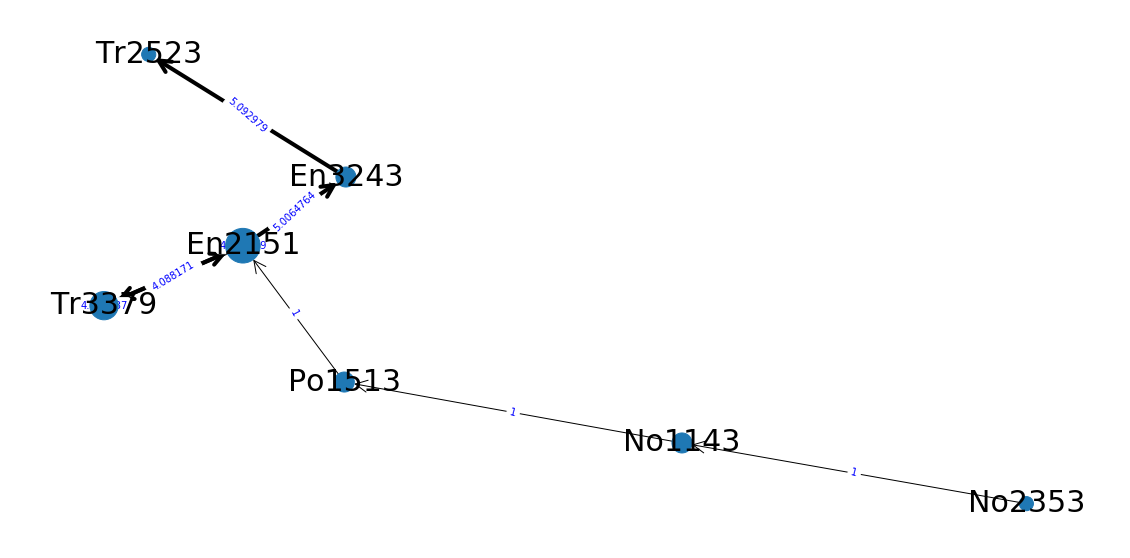

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(20,10))
pos = nx.spring_layout(G)
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels , font_size=10 , font_color = 'blue')
nx.draw(G, pos , node_size=[v*200 for v in list((dict(G.degree())).values())], font_size=30 , with_labels=True ,  
        width=edge_weight , arrowstyle='->' , arrowsize=30)
plt.show()
plt.savefig('pred_event.png')